# Michał Szczurek - laboratorium 5.

### 0. Przygotowanie środowiska i funkcji całkowanej 

In [13]:
from sympy import *
from sympy.abc import x
import numpy as np
import math
import matplotlib.pyplot as plt

Text(0.0, 1.0, 'Wykres całkowanej funkcji')

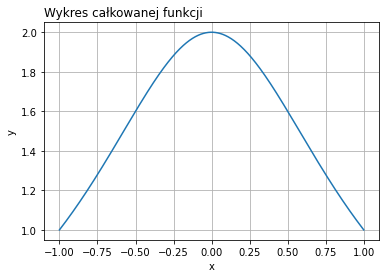

In [14]:
func = 2 / (1+x**2) 
pts = np.linspace(-1,1,500)
y = [func.subs(x,p) for p in pts]
plt.plot(pts,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title("Wykres całkowanej funkcji",loc='left')

## 1. Całkowanie numeryczne:

### 1.1 Metoda prostokątów

In [15]:
def midpoint(func, a, b, n):
    res = 0
    n = n+1 # we want n+1 evals, in this method there is (b-a)/h evals
    h = (b-a)/n
    for i in range(1, n+1):
        p = func.subs(x, a + h/2 + (i-1)*h )
        res += p*h
        
    return res

### 1.2 Metoda trapezów

In [16]:
def trapezoid(func, a, b, n):
    res = 0
    h = (b-a)/n
    for i in range(1, n+1):
        p1 = func.subs(x, a + (i-1)*h)
        p2 = func.subs(x, a + i*h)
        res += (p1 + p2)*h/2
        
    return res

### 1.3 Metoda Simpsona

In [17]:
def simpson(func, a, b, n):
    res = 0
    h = (b-a)/n
    for i in range(0, int(n/2)):
        l = func.subs(x, a + 2*h*i)
        m = func.subs(x, a + 2*h*i + h)
        r = func.subs(x, a + 2*h*i + 2*h)  
        res += l + 4*m + r
    res *= h/3
        
    return res

### 1.4 Kwadratura Gaussaa

In [18]:
def gauss(f, n): # version for interval (-1,1)
    poly = legendre_poly(n+1, x, polys=True)
    poly_d = diff(poly, x)
    roots = poly.real_roots()
    res = 0
    for root in roots:
        if type(root) != Mul and root != 0: 
            x_i = root.eval_rational()
        else:
             x_i = root
        w = 2/((1 - x_i**2) * poly_d.subs(x, x_i)**2)
        res +=  w * f.subs(x, x_i)
    return N(res)

## 2. Generowanie wykresów

In [19]:
def plot_err(method, func, expected, start, n, step, title):
    vals = []
    n_vec = []
    for i in range(n):
        if method != gauss:
            vals.append(method(func,-1,1, start + i*step))
        else:
            vals.append(method(func, start + i*step))
        n_vec.append(start + i*step+1)
    vals = [abs(v-expected)/expected for v in vals]
    
    plt.plot(n_vec, vals)
    plt.scatter(n_vec, vals, s=15, c = 'red') 
    plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
    plt.ylabel('Błąd względny')
    plt.grid()
    plt.title(title,loc='left')
    plt.show()

In [20]:
def plot_res1(method, func, expected, start, n, step, title):
    vals = []
    vals_true = [expected for i in range(n)]
    n_vec = []
    for i in range(n):
        if method != gauss:
            vals.append(method(func,-1,1, start + i*step))
        else:
            vals.append(method(func, start + i*step))
        n_vec.append(start + i*step+1)
    plt.plot(n_vec, vals_true, c = 'black', label="Wartość prawdziwa") 
    plt.plot(n_vec, vals ,label = "Uzyskany wynik")
    plt.scatter(n_vec, vals, s=15, c = 'red') 
    plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
    plt.ylabel('x')
    plt.grid()
    plt.legend(bbox_to_anchor=(0.47, -0.15))   
    plt.title(title,loc='left')
    plt.show()

In [21]:
def plot_err_log(method, func, expected, n, title):
    vals = []
   
    n_vec = []
    n = np.logspace(1, 4, num=n)
    n = [int(v) for v in n]
    for id_,i in enumerate(n):
        if i%2 != 0:
            i+=1
        #print(id_,i)
        if method != gauss:
            vals.append(method(func,-1,1,i))
        else:
            vals.append(method(func, i))
        n_vec.append(i+1)
    vals = [abs(v-expected)/expected for v in vals]
    plt.yscale('log')
    #print(vals)
    #print(n_vec)
    plt.xscale('log')
    plt.plot(n_vec, vals)
    plt.scatter(n_vec, vals, s=15, c = 'red',label = "Uzyskany błąd względny") 
    plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
    plt.ylabel('x')
    plt.grid()
    plt.legend(bbox_to_anchor=(0.47, -0.15))   
    plt.title(title,loc='left')
    plt.show()

In [22]:
def plot_res(func, expected,start, n, step, title):
    vals_simpson = []
    vals_midpoint= []
    vals_trapezoid= []
    vals_gauss = []
    n_vec = []
    vals_true = [expected for i in range(n)]
    for i in range(n):
        vals_simpson.append(simpson(func,-1,1, start + i*step))
        vals_midpoint.append(midpoint(func,-1,1, start + i*step))
        vals_trapezoid.append(trapezoid(func,-1,1, start + i*step))
        vals_gauss.append(gauss(func, start + i*step))
        n_vec.append(start + i*step+1)
    
    plt.plot(n_vec, vals_gauss, c = 'red', label="Kwadratura Gaussa") 
    plt.scatter(n_vec, vals_gauss, s=15, c = 'red') 
    plt.plot(n_vec, vals_midpoint, c = 'blue', label="Metoda prostokątów") 
    plt.scatter(n_vec, vals_midpoint, s=15, c = 'blue')
    plt.plot(n_vec, vals_trapezoid, c = 'green', label="Metoda trapezów") 
    plt.scatter(n_vec, vals_trapezoid, s=15, c = 'green')
    plt.plot(n_vec, vals_simpson, c = 'orange', label="Metoda Simpsona") 
    plt.scatter(n_vec, vals_simpson, s=15, c = 'orange')
    plt.plot(n_vec, vals_true, c = 'black', label="Wartość prawdziwa") 
    
    plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
    plt.ylabel('Uzyskany wynik')
    plt.grid()
    plt.legend(bbox_to_anchor=(1.5, 0.8))   
    plt.title(title,loc='left')
    plt.show()

In [23]:
def plot_errors(func, expected,start, n, step, title):
    vals_simpson = []
    vals_midpoint= []
    vals_trapezoid= []
    vals_gauss = []
    n_vec = []
    for i in range(n):
        vals_simpson.append(abs((simpson(func,-1,1, start + i*step)-expected)/expected))
        vals_midpoint.append(abs((midpoint(func,-1,1, start + i*step)-expected)/expected))
        vals_trapezoid.append(abs((trapezoid(func,-1,1, start + i*step)-expected)/expected))
        vals_gauss.append(abs((gauss(func, start + i*step)-expected)/expected))
        n_vec.append(start + i*step+1)
    
    plt.plot(n_vec, vals_gauss, c = 'red', label="Kwadratura Gaussa") 
    plt.scatter(n_vec, vals_gauss, s=15, c = 'red') 
    plt.plot(n_vec, vals_midpoint, c = 'blue', label="Metoda prostokątów") 
    plt.scatter(n_vec, vals_midpoint, s=15, c = 'blue')
    plt.plot(n_vec, vals_trapezoid, c = 'green', label="Metoda trapezów") 
    plt.scatter(n_vec, vals_trapezoid, s=15, c = 'green')
    plt.plot(n_vec, vals_simpson, c = 'orange', label="Metoda Simpsona") 
    plt.scatter(n_vec, vals_simpson, s=15, c = 'orange')
    
    plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
    plt.ylabel('Błąd względny')
    plt.grid()
    plt.legend(bbox_to_anchor=(1.5, 0.8))   
    plt.title(title,loc='left')
    plt.show()

In [24]:
def plot_errors_2(func, expected,start, n, step, title):
    vals_gauss= []
    vals_simpson= []
    n_vec = []
    for i in range(n):
        vals_gauss.append(abs((gauss(func, start + i*step)-expected)/expected))
        vals_simpson.append(abs((simpson(func,-1,1, start + i*step)-expected)/expected))
        n_vec.append(start + i*step+1)
    
    plt.plot(n_vec, vals_gauss, c = 'red', label="Kwadratura Gaussa") 
    plt.scatter(n_vec, vals_gauss, s=15, c = 'red') 
    plt.plot(n_vec, vals_simpson, c = 'orange', label="Metoda Simpsona") 
    plt.scatter(n_vec, vals_simpson, s=15, c = 'orange')
    
    plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
    plt.ylabel('Błąd względny')
    plt.grid()
    plt.legend(bbox_to_anchor=(1.5, 0.8))   
    plt.title(title, y=1.08)
    plt.show()

In [25]:
from matplotlib.ticker import FuncFormatter, Locator

def plot_err_log_y(method, func, expected, start, n, step, title):
    vals = []
    n_vec = []
    for i in range(n):
        if method != gauss:
            vals.append(method(func,-1,1, start + i*step))
        else:
            vals.append(method(func, start + i*step))
        n_vec.append(start + i*step+1)
    vals = [abs(v-expected)/expected for v in vals]
    plt.plot(n_vec, vals)
    plt.yscale('log')
    plt.scatter(n_vec, vals, s=15, c = 'red') 
    plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
    plt.ylabel('Błąd względny')
    plt.grid()
    plt.title(title,loc='left')
    plt.show()
    return vals

## 3. Graficzne przedstawienie wyników

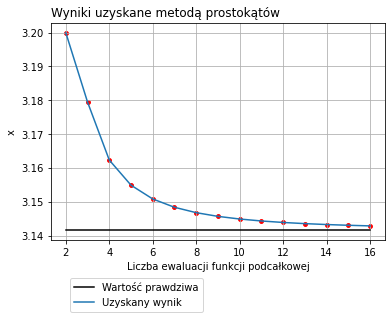

In [26]:
plot_res1(midpoint,func, math.pi ,1, 15, 1, "Wyniki uzyskane metodą prostokątów")

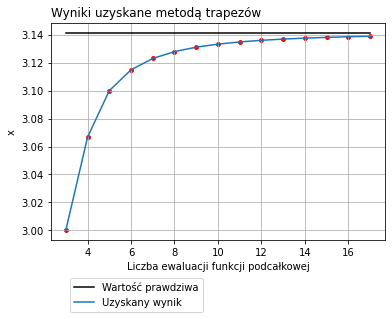

In [27]:
plot_res1(trapezoid,func, math.pi ,2, 15, 1, "Wyniki uzyskane metodą trapezów")

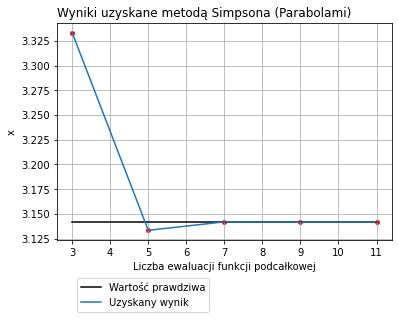

In [28]:
plot_res1(simpson,func, math.pi ,2, 5, 2, "Wyniki uzyskane metodą Simpsona (Parabolami)")

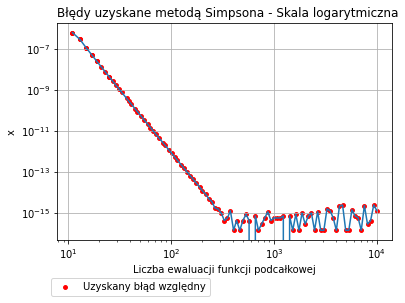

In [33]:
plot_err_log(simpson, func, math.pi , 100, "Błędy uzyskane metodą Simpsona - Skala logarytmiczna")

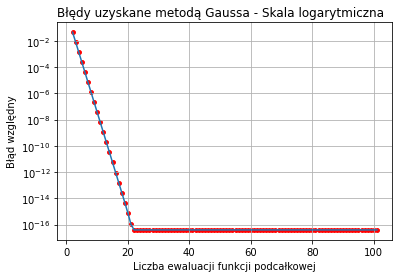

In [34]:
 v = plot_err_log_y(gauss, func, pi, 1,100, 1, "Błędy uzyskane metodą Gaussa - Skala logarytmiczna")

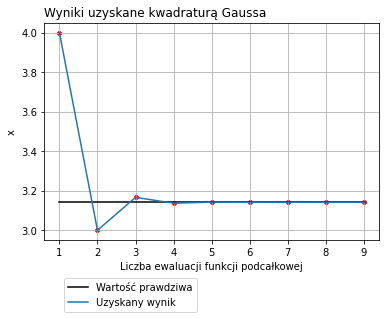

In [24]:
plot_res1(gauss,func, math.pi ,0, 9, 1, "Wyniki uzyskane kwadraturą Gaussa")

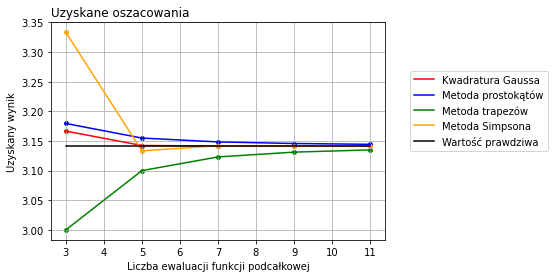

In [25]:
plot_res(func, math.pi ,2, 5, 2, "Uzyskane oszacowania")

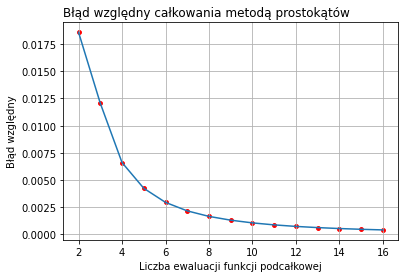

In [26]:
plot_err(midpoint, func, math.pi, 1, 15, 1, "Błąd względny całkowania metodą prostokątów")

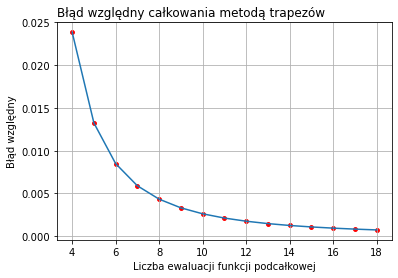

In [27]:
plot_err(trapezoid, func, math.pi, 3, 15, 1, "Błąd względny całkowania metodą trapezów ")

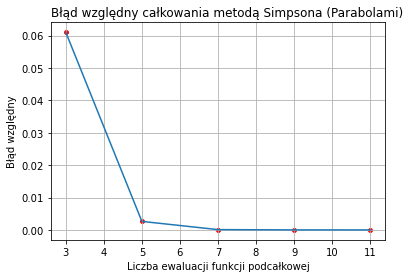

In [28]:
plot_err(simpson, func, math.pi, 2, 5, 2, "Błąd względny całkowania metodą Simpsona (Parabolami)")

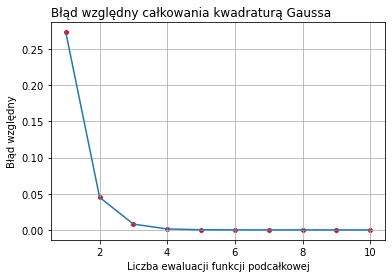

In [29]:
plot_err(gauss, func, math.pi, 0, 10, 1, "Błąd względny całkowania kwadraturą Gaussa")

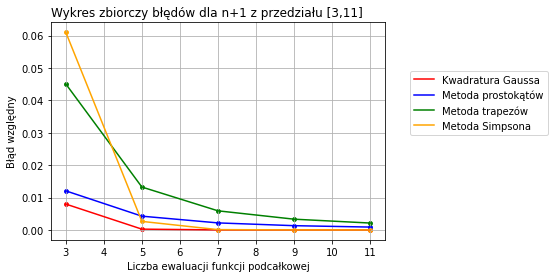

In [30]:
plot_errors(func, math.pi ,2, 5, 2, "Wykres zbiorczy błędów dla n+1 z przedziału [3,11]")

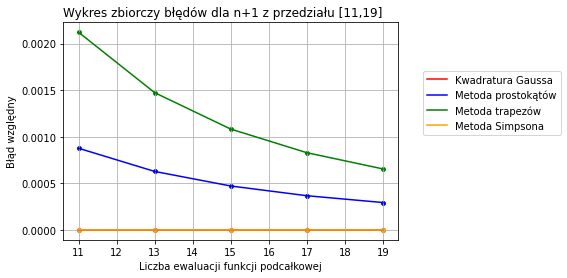

In [31]:
plot_errors(func, math.pi ,10, 5, 2, "Wykres zbiorczy błędów dla n+1 z przedziału [11,19]")

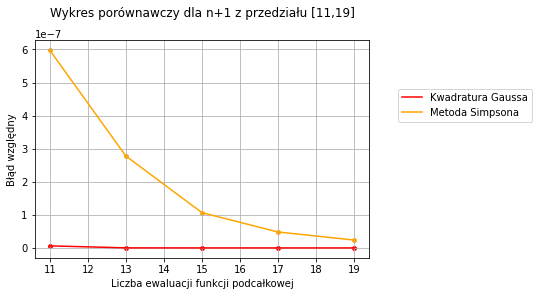

In [32]:
plot_errors_2(func, math.pi ,10, 5, 2, "Wykres porównawczy dla n+1 z przedziału [11,19]")